In [113]:
import spacy
from spacypdfreader.spacypdfreader import pdf_reader
from itertools import groupby
from text_processing_methods import preprocess_text, generate_index
import nltk
from nltk.corpus import stopwords
from spellchecker import SpellChecker
from spacypdfreader.spacypdfreader import pdf_reader
import matplotlib.pyplot as plt
import pprint
import re

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [102]:
def preprocess_text(doc):
    stop_words = set(stopwords.words('russian'))
    cleaned_tokens = []
    for token in doc:
        if not token.is_space and not token.is_punct and not token.like_num and not token.is_title and token.text not in stop_words and re.search(r'[^а-яА-Я\n]', token.text) is None:
            cleaned_tokens.append(token.lemma_.lower())
        # if token.is_title:
        #     cleaned_tokens.append(token.text)
    return cleaned_tokens

In [103]:
def generate_index(doc, words_list):
    index = {}
    line_number = 1
    page_number = 0
    new_row_error_margin = 2
    new_row_pos = 0

    for i in range(len(doc)):
        
        word_from_original = str(doc[i].lemma_.lower())

        if word_from_original in words_list and word_from_original not in index:
            index[word_from_original] = {'номер страницы: ': page_number, 'номер строки: ': line_number}
        
        if '\n' == str(doc[i]):
            # if i - new_row_pos >= new_row_error_margin: 
            line_number += 1
            new_row_pos = i

        if page_number != doc[i]._.page_number:
            line_number = 1
            page_number = doc[i]._.page_number

    return index

In [136]:
pprint.pprint(main_words_usage) # type: ignore

[['орган', 4145],
 ['обращение', 2923],
 ['лицо', 1808],
 ['государственный', 1702],
 ['вопрос', 1604],
 ['гражданин', 1503],
 ['приём', 1161],
 ['местный', 1134],
 ['самоуправление', 1064],
 ['заявитель', 1003],
 ['рассмотрение', 972],
 ['соответствующий', 960],
 ['решение', 875],
 ['федеральный', 808],
 ['субъект', 763],
 ['личный', 748],
 ['власть', 706],
 ['организация', 602],
 ['исполнительный', 590],
 ['форма', 586],
 ['число', 568],
 ['информация', 558],
 ['электронный', 516],
 ['год', 499],
 ['автор', 498],
 ['результат', 491],
 ['право', 481],
 ['деятельность', 479],
 ['документ', 466],
 ['должностной', 460],
 ['город', 455],
 ['компетенция', 451],
 ['обеспечение', 448],
 ['порядок', 445],
 ['ответ', 432],
 ['принять', 429],
 ['поступить', 418],
 ['входить', 412],
 ['соответствие', 408],
 ['уполномочить', 406],
 ['режим', 399],
 ['закон', 398],
 ['работа', 386],
 ['связь', 381],
 ['проведение', 365],
 ['поставить', 352],
 ['наименование', 351],
 ['приёмный', 351],
 ['рекоменда

In [104]:
nlp = spacy.load('ru_core_news_lg')
doc = pdf_reader('met_recommendations.pdf', nlp)


cleaned_text = preprocess_text(doc)

word_usage = [[key, len(list(group))] for key, group in groupby(sorted(cleaned_text))]

sorted_word_usage = sorted(word_usage,  reverse=True, key=lambda x: x[1])

main_words_usage = sorted_word_usage[0:100]

main_words = [i[0] for i in main_words_usage] 

x = generate_index(doc, main_words)
pprint.pprint(x)

{'автор': {'номер страницы: ': 6, 'номер строки: ': 34},
 'адрес': {'номер страницы: ': 19, 'номер строки: ': 11},
 'вид': {'номер страницы: ': 8, 'номер строки: ': 2},
 'власть': {'номер страницы: ': 4, 'номер строки: ': 20},
 'вопрос': {'номер страницы: ': 7, 'номер строки: ': 3},
 'входить': {'номер страницы: ': 9, 'номер строки: ': 45},
 'год': {'номер страницы: ': 4, 'номер строки: ': 27},
 'город': {'номер страницы: ': 6, 'номер строки: ': 6},
 'государственный': {'номер страницы: ': 1, 'номер строки: ': 4},
 'гражданин': {'номер страницы: ': 1, 'номер строки: ': 2},
 'гражданство': {'номер страницы: ': 1, 'номер строки: ': 3},
 'данного': {'номер страницы: ': 33, 'номер строки: ': 20},
 'день': {'номер страницы: ': 6, 'номер строки: ': 29},
 'деятельность': {'номер страницы: ': 3, 'номер строки: ': 4},
 'документ': {'номер страницы: ': 8, 'номер строки: ': 2},
 'должностной': {'номер страницы: ': 4, 'номер строки: ': 2},
 'дом': {'номер страницы: ': 235, 'номер строки: ': 35},
 

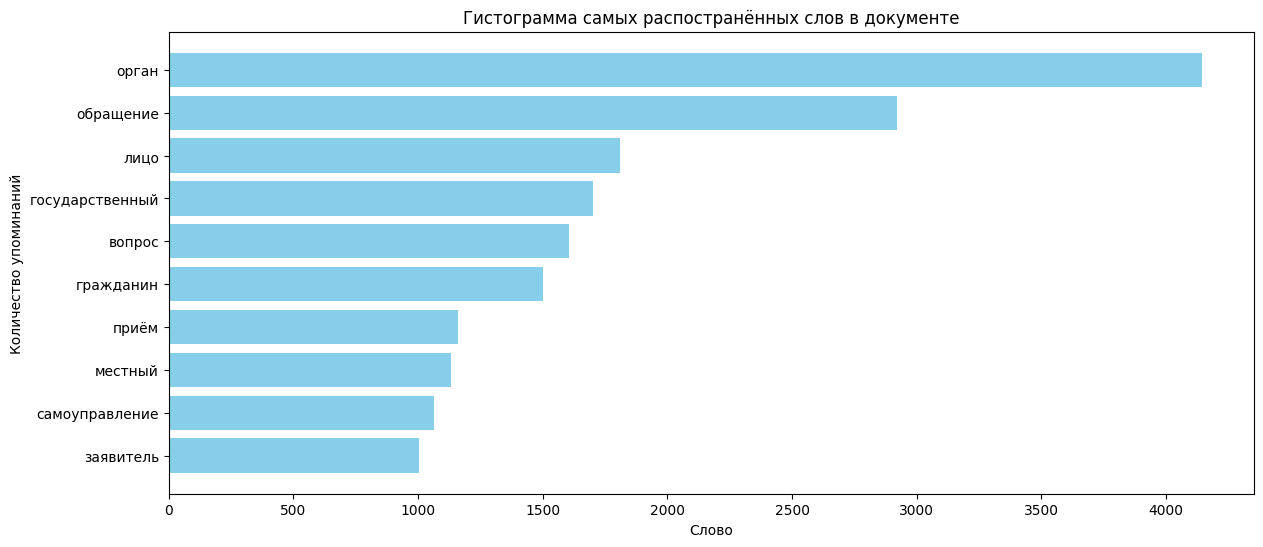

In [131]:
plt.figure(figsize=(14, 6)) # Построение горизонтальной гистограммы
plt.barh([i[0] for i in main_words_usage[0:10]][::-1], [i[1] for i in main_words_usage[0:10]][::-1], color='skyblue')
plt.xlabel("Слово")
plt.ylabel("Количество упоминаний")
plt.title("Гистограмма самых распостранённых слов в документе")
plt.show()

In [110]:
joined_text = ' '.join(cleaned_text)
pprint.pprint(joined_text)

('сборник методических рекомендаций документов том числе электронном виде '
 'работа обращение запрос российский иностранный гражданин лицо гражданство '
 'объединение гражданин число юридический лицо приёмный государственный орган '
 'орган местный самоуправление государственный муниципальный учреждение иных '
 'организация которые возложить осуществление публично значимый функция '
 'оглавление методический рекомендации число гражданин результат показатель '
 'рассмотрение социальный экономический совершенствование работа обращение '
 'российский иностранный гражданин лицо гражданство объединение гражданин '
 'число юридический лицо государственный орган орган местный самоуправление '
 'цель совершенствование деятельность обеспечение достижение развитие целевой '
 'определённый учёт систематизация обобщение обращение запрос российский '
 'иностранный гражданин лицо гражданство юридический объединение лицо принять '
 'мера государственный орган орган местный самоуправление работа отде

In [137]:
def check_spelling(processed_text, nlp):
    spell = SpellChecker(language='ru')

    corrected_words = []
    
    for i in range(len(processed_text)):
        corrected_word = spell.correction(processed_text[i])

        if corrected_word != processed_text[i]:
            processed_text[i] = corrected_word    
            corrected_words.append(corrected_word)  
    # corrected_words = [word for word in corrected_words if word is not None and word != '']
    # corrected_doc = spacy.tokens.Doc(nlp.vocab, words=corrected_words)
    return (processed_text, corrected_words)

# print(doc)
# print(check_spelling(doc, nlp))



In [27]:
doc_ = pdf_reader('test_wrong_spelling.pdf', nlp)

test_text = preprocess_text(test_doc)

In [28]:
test_text

['предложение', 'ошипка', 'хороший']

In [29]:
x = check_spelling(test_text, nlp)
print(x)

(['предложение', 'ошибка', 'хороший'], ['ошибка'])
